Seed 4100 is repeated. The following results may be repeated.
x1	 1466521              4665
x2	 21762225             7622
x3	 58094884             948
x4	 898704               8987
x5	 80766169             7661
x6	 58690921             6909
x7	 47734281             7342
x8	 53904964             9049
x9	 81884401             8844
x10	 78216336             2163
x11	 4678569              6785
x12	 46036225             362
x13	 131044               1310
x14	 1716100              7161
x15	 51279921             2799
x16	 7834401              8344
x17	 69622336             6223
x18	 38725729             7257
x19	 52664049             6640
x20	 44089600             896
x21	 802816               8028
x22	 64448784             4487
x23	 20133169             1331
x24	 1771561              7715
x25	 59521225             5212
x26	 27164944             1649
x27	 2719201              7192
x28	 51724864             7248
x29	 52533504             5335
x30	 28462225             4622
x31	 21362884       

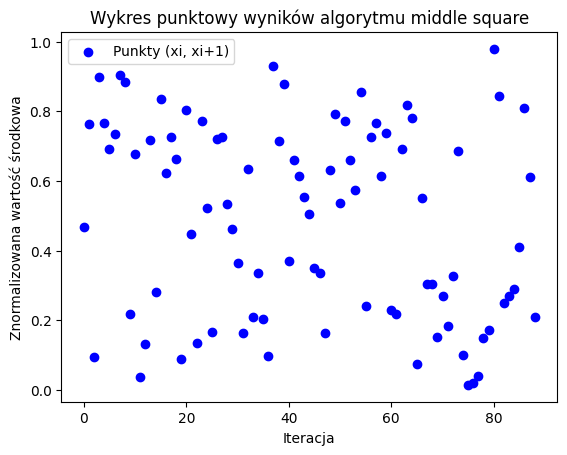

x1	 152415765279684      41576527
x2	 1728607597381729     60759738
x3	 3691745761828644     74576182
x4	 5561606921697124     60692169
x5	 3683539377924561     53937792
x6	 2909285405835264     28540583
x7	 814564877979889      56487797
x8	 3190871209913209     87120991
x9	 7590067072822081     6707282
x10	 44987631827524       98763182
x11	 9754166118765124     16611876
x12	 275954424239376      95442423
x13	 9109256108110929     25610811
x14	 655913640077721      91364007
x15	 8347381775096049     38177509
x16	 1457522193445081     52219344
x17	 2726859887790336     85988779
x18	 7394070113910841     7011391
x19	 49159603754881       15960375
x20	 254733570140625      73357014
x21	 5381251502996196     25150299
x22	 632537539789401      53753978
x23	 2889490150824484     49015082
x24	 2402478263466724     47826346
x25	 2287359371711716     35937171
x26	 1291480259483241     48025948
x27	 2306491681298704     49168129
x28	 2417504909360641     50490936
x29	 2549334618156096     33461

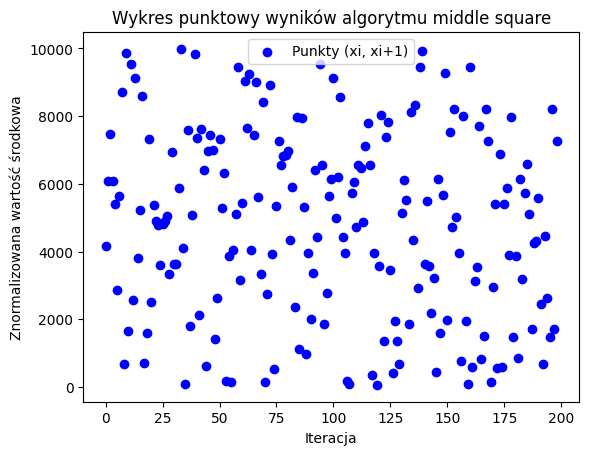

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def middle_square(seed, iterations):
    if seed <= 0 or iterations <= 0:
        raise ValueError("Seed and iterations must be positive integers")

    num_digits = len(str(seed))
    results = []

    # Set to store seen seeds
    seen_seeds = set()

    for _ in range(iterations):
        square = seed ** 2
        square_str = str(square).zfill(2 * num_digits)
        middle = int(square_str[(len(square_str) - num_digits) // 2 : (len(square_str) + num_digits) // 2])

        # If the seed repeats, break the loop
        if seed in seen_seeds:
            print(f"Seed {seed} is repeated. The following results may be repeated.")
            break
        else:
            seen_seeds.add(seed)

        results.append((seed, middle, square))
        seed = middle

    return results

def print_results(results):
    for i, (seed, middle, square) in enumerate(results):
        print(f'x{i+1}\t {square:<20} {middle}')

def plot_results(results):
    x_values = [i for i in range(len(results) - 1)]
    normalized_results = [middle / 10000 for _, middle, _ in results[:-1]]

    # Plotting the points with normalized values
    plt.scatter(x_values, normalized_results, c='blue', label='Punkty (xi, xi+1)')
    plt.xlabel('Iteracja')
    plt.ylabel('Znormalizowana wartość środkowa')
    plt.title('Wykres punktowy wyników algorytmu middle square')

    # Obliczamy całkę od 0 do 1 z e^-x^2
    x = np.linspace(0, 1, 1000)  # Zakres od 0 do 1
    y = np.exp(-x**2)  # Funkcja e^-x^2
    integral = np.trapz(y, x)  # Obliczamy całkę numerycznie

    print("Wartość całki od 0 do 1 z e^-x^2:", integral)

    plt.legend()
    plt.show()

results = middle_square(1211, 100)
print_results(results)
plot_results(results)

# Testing the function with an 8-digit seed
results = middle_square(12345678, 200)
print_results(results)
plot_results(results)


In [18]:
import numpy as np

def middle_square(seed, iterations):
    if seed <= 0 or iterations <= 0:
        raise ValueError("Seed and iterations must be positive integers")

    num_digits = len(str(seed))
    results = []

    # Set to store seen seeds
    seen_seeds = set()

    for _ in range(iterations):
        square = seed ** 2
        square_str = str(square).zfill(2 * num_digits)
        middle = int(square_str[(len(square_str) - num_digits) // 2 : (len(square_str) + num_digits) // 2])

        # If the seed repeats, break the loop
        if seed in seen_seeds:
            print(f"Seed {seed} is repeated. The following results may be repeated.")
            break
        else:
            seen_seeds.add(seed)

        results.append((seed, middle, square))
        seed = middle

    return results

def transform_data(X, a, b):
    return a * np.array(X) + b

# Run middle square algorithm to generate random numbers
results = middle_square(1211, 90)

# Extract the generated numbers
generated_numbers = [middle / 10000 for _, middle, _ in results]

# Parameters for transformation
a = 2
b = 5

# Transform the generated numbers
transformed_numbers = transform_data(generated_numbers, a, b)

# Calculate variance
var_X = np.var(generated_numbers)
var_Y = np.var(transformed_numbers)
var_Y_expected = a**2 * var_X

print(f"var_X = {var_X} \nvar_Y = {var_Y} \nvar_Y_expected = {var_Y_expected}")
if var_Y-var_Y_expected==0:
  print("var(aX + b) = a**2 * var(X)")


var_X = 0.07509963559135803 
var_Y = 0.3003985423654321 
var_Y_expected = 0.3003985423654321
var(aX + b) = a**2 * var(X)


In [37]:
import numpy as np

def middle_square(seed, iterations):
    if seed <= 0 or iterations <= 0:
        raise ValueError("Seed and iterations must be positive integers")

    num_digits = len(str(seed))
    results = []
    poisson_samples = []

    # Set to store seen seeds
    seen_seeds = set()

    for _ in range(iterations):
        square = seed ** 2
        square_str = str(square).zfill(2 * num_digits)
        middle = int(square_str[(len(square_str) - num_digits) // 2 : (len(square_str) + num_digits) // 2])

        # If the seed repeats, break the loop
        if seed in seen_seeds:
            print(f"Seed {seed} is repeated. The following results may be repeated.")
            break
        else:
            seen_seeds.add(seed)

        results.append((seed, middle, square))
        seed = middle

        # Generowanie próbki z rozkładu Poissona na podstawie kwadratu środkowego
        poisson_sample = np.random.poisson(middle)
        poisson_samples.append(poisson_sample)

    return results, poisson_samples


In [57]:
import numpy as np

def simulate_insurance_company(initial_capital, claim_rate, claim_mean, payment_rate, days):
    positive_capital_count = 0

    for _ in range(1000):
        capital = initial_capital
        for _ in range(days):
            claims = np.random.poisson(claim_rate)
            total_claims = np.random.exponential(scale=claim_mean, size=claims).sum()
            total_payments = payment_rate
            capital += total_payments - total_claims
            if capital <= 0:
                break
        if capital > 0:
            positive_capital_count += 1

    return positive_capital_count / 1000

initial_capital = 25000
claim_rate = 10
claim_mean = 1000
payment_rate = 11000
days = 365

probability_positive_capital = simulate_insurance_company(initial_capital, claim_rate, claim_mean, payment_rate, days)
print(f"Prawdopodobieństwo, że kapitał będzie zawsze dodatni przez pierwszych {days} dni:", probability_positive_capital)


Prawdopodobieństwo, że kapitał będzie zawsze dodatni przez pierwszych 365 dni: 0.92


In [58]:
import numpy as np

def simulate_insurance_company(initial_capital, claim_rate, claim_mean, payment_rate, days):
    positive_capital_count = 0

    for _ in range(simulations):
        capital = initial_capital
        print("Dzień 0: Kapitał początkowy =", capital)
        print("------",_,"------")
        for day in range(1, days + 1):
            claims = np.random.poisson(claim_rate)
            total_claims = np.random.exponential(scale=claim_mean, size=claims).sum()
            capital += payment_rate - total_claims
            print(f"Dzień {day}: Kapitał =", capital)
            print(f"Klienci w dniu {claims}")
            print(f"Pobrano w dniu {total_claims}")
            if capital <= 0:
                print(f"Bankructwo w dniu {day}")
                break
        if capital > 0:
            positive_capital_count += 1
            print("Kapitał pozostaje dodatni przez cały okres.")
        else:
            print("Kapitał spadł poniżej zera.")
        print("------------------------------------------------------------------------")

    return positive_capital_count / simulations

initial_capital = 25000
claim_rate = 10
claim_mean = 1000
payment_rate = 11000
days = 365
simulations = 100

probability_positive_capital = simulate_insurance_company(initial_capital, claim_rate, claim_mean, payment_rate, days)
print(f"Prawdopodobieństwo, że kapitał będzie zawsze dodatni przez pierwszych {days} dni:", probability_positive_capital)


Dzień 0: Kapitał początkowy = 25000
------ 0 ------
Dzień 1: Kapitał = 29978.348964451303
Klienci w dniu 9
Pobrano w dniu 6021.651035548695
Dzień 2: Kapitał = 28835.157575678284
Klienci w dniu 15
Pobrano w dniu 12143.191388773019
Dzień 3: Kapitał = 35426.70097638556
Klienci w dniu 7
Pobrano w dniu 4408.45659929272
Dzień 4: Kapitał = 31241.83322548416
Klienci w dniu 11
Pobrano w dniu 15184.867750901401
Dzień 5: Kapitał = 30980.889450837523
Klienci w dniu 13
Pobrano w dniu 11260.943774646636
Dzień 6: Kapitał = 28429.921676789665
Klienci w dniu 12
Pobrano w dniu 13550.96777404786
Dzień 7: Kapitał = 32797.351919436405
Klienci w dniu 7
Pobrano w dniu 6632.569757353258
Dzień 8: Kapitał = 36805.33626342527
Klienci w dniu 9
Pobrano w dniu 6992.0156560111345
Dzień 9: Kapitał = 37727.5526934454
Klienci w dniu 10
Pobrano w dniu 10077.783569979865
Dzień 10: Kapitał = 27613.03461852202
Klienci w dniu 12
Pobrano w dniu 21114.518074923384
Dzień 11: Kapitał = 29780.67196354891
Klienci w dniu 9
Pobrano

KeyboardInterrupt: 

In [53]:
import numpy as np

# Parametry symulacji
initial_capital = 25000
claim_rate = 10
claim_mean = 1000
payment_rate = 11000
days = 365
simulations = 100

def my_poisson(rate):
    # Generowanie liczby z rozkładu Poissona
    k = 0
    p = 1.0
    L = np.exp(-rate)
    while p > L:
        k += 1
        u = np.random.random()
        p *= u
    return k - 1

def simulate_insurance_company(initial_capital, claim_rate, claim_mean, payment_rate, days):
    positive_capital_count = 0

    for _ in range(simulations):
        capital = initial_capital
        print("Dzień 0: Kapitał początkowy =", capital)
        print("------",_,"------")
        for day in range(1, days + 1):
            claims = my_poisson(claim_rate)
            total_claims = np.random.exponential(scale=claim_mean, size=claims).sum()
            capital += payment_rate - total_claims
            print(f"Dzień {day}: Kapitał =", capital)
            print(f"Klienci w dniu {claims}")
            print(f"Pobrano w dniu {total_claims}")
            if capital <= 0:
                print(f"Bankructwo w dniu {day}")
                break
        if capital > 0:
            positive_capital_count += 1
            print("Kapitał pozostaje dodatni przez cały okres.")
        else:
            print("Kapitał spadł poniżej zera.")
        print("------")

    return positive_capital_count / simulations

probability_positive_capital = simulate_insurance_company(initial_capital, claim_rate, claim_mean, payment_rate, days)
print(f"Prawdopodobieństwo, że kapitał będzie zawsze dodatni przez pierwszych {days} dni:", probability_positive_capital)


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Pobrano w dniu 21269.48677486802
Dzień 166: Kapitał = 190173.30505429633
Klienci w dniu 11
Pobrano w dniu 14542.50628585224
Dzień 167: Kapitał = 190817.69585099138
Klienci w dniu 11
Pobrano w dniu 10355.609203304937
Dzień 168: Kapitał = 192056.12139735822
Klienci w dniu 13
Pobrano w dniu 9761.57445363315
Dzień 169: Kapitał = 193831.62780553725
Klienci w dniu 8
Pobrano w dniu 9224.493591820969
Dzień 170: Kapitał = 198580.02747765937
Klienci w dniu 8
Pobrano w dniu 6251.600327877875
Dzień 171: Kapitał = 203154.47376936118
Klienci w dniu 6
Pobrano w dniu 6425.553708298203
Dzień 172: Kapitał = 209541.27080402616
Klienci w dniu 6
Pobrano w dniu 4613.202965335015
Dzień 173: Kapitał = 199280.49234523845
Klienci w dniu 15
Pobrano w dniu 21260.778458787714
Dzień 174: Kapitał = 201876.7603474802
Klienci w dniu 13
Pobrano w dniu 8403.731997758263
Dzień 175: Kapitał = 205654.5138789666
Klienci w dniu 11
Pobrano w dniu 7222.2464685135

In [50]:
# Parametry symulacji
kapital_poczatkowy = 25000
stawka_przychodu_dziennego = 11000
tempo_roszczen = 10  # roszczenia na dzień
srednia_kwota_roszczenia = 1000
liczba_dni = 365
liczba_symulacji = 1000

# Liniowy generator kongruencyjny
class LCG:
    def __init__(self, seed, a=1664525, c=1013904223, m=2**32):
        self.seed = seed
        self.a = a
        self.c = c
        self.m = m

    def random(self):
        self.seed = (self.a * self.seed + self.c) % self.m
        return self.seed / self.m

def symuluj_rok(seed2):
    generator = LCG(seed=seed2)  # Inicjalizacja generatora liczb losowych
    kapital = kapital_poczatkowy
    for dzien in range(liczba_dni):
        # Generowanie liczby roszczeń dla danego dnia
        liczba_roszczen = int(generator.random() * tempo_roszczen)  # Użycie generatora do wygenerowania liczby roszczeń
        # Suma roszczeń dla danego dnia
        roszczenia = sum(generator.random() * srednia_kwota_roszczenia for _ in range(liczba_roszczen))  # Użycie generatora do wygenerowania kwoty roszczeń
        # Aktualizacja kapitału
        kapital += stawka_przychodu_dziennego - roszczenia
        # Sprawdzenie, czy kapitał jest dodatni
        if kapital < 0:
            return False  # kapitał spadł poniżej zera
    return True  # kapitał pozostał dodatni przez cały rok

# Symulacja wielokrotna
wyniki = [symuluj_rok(_+1) for _ in range(liczba_symulacji)]
prawdopodobienstwo = sum(wynik for wynik in wyniki) / liczba_symulacji
print(f'Prawdopodobieństwo, że kapitał będzie dodatni przez 365 dni wynosi: {prawdopodobienstwo:.4f}')


Prawdopodobieństwo, że kapitał będzie dodatni przez 365 dni wynosi: 1.0000
